In [65]:
# wczytanie danych
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dane=pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/practice_lab_3.xlsx')
dane.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360,1,Urban,Y


In [66]:
# zamiana cech jakościowych na ilościowe
dane = pd.get_dummies(dane,drop_first=True)
dane.head()

# podział zbioru na testowy i uczący
from sklearn.model_selection import train_test_split
import numpy as np
tabela = np.array(dane)
y = tabela[:, -1]  # zmienna zależna
X = tabela[:, :-1]  # zmienne niezależne
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2022)
nazwy_kolumn = list(dane.columns)

# skalowanie wartości
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Zadanie 6.2**

In [67]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

# funkcja tworząca strukturę 
def build_model_6_2(do_rate=0):
  model = Sequential()
  model.add(Dense(64,activation='relu',input_shape = (X.shape[1],))) # pierwsza warstwa
  
  model.add(Dropout(do_rate,))#warstwa ukryta 1.
  model.add(Dense(64,'selu'))#warstwa ukryta 2.
  model.add(Dropout(do_rate,))#warstwa ukryta 3.
  model.add(Dense(64,'selu'))#warstwa ukryta 4.

  model.add(Dense(1,activation='sigmoid'))# ostatnia warstwa
  model.compile(optimizer=Adam(0.001),loss='binary_crossentropy',metrics=('accuracy','Recall','Precision'))
  #loss='binary_crossentropy', metrics=('accuracy', 'Recall', 'Precision')
  return model


Epoch 1/20
15/15 [==============================] - 2s 34ms/step - loss: 0.6232 - accuracy: 0.6783 - recall: 0.9042 - precision: 0.7057 - val_loss: 0.5480 - val_accuracy: 0.7922 - val_recall: 0.9725 - val_precision: 0.7852
Epoch 2/20
15/15 [==============================] - 0s 6ms/step - loss: 0.4904 - accuracy: 0.8109 - recall: 0.9712 - precision: 0.7958 - val_loss: 0.4970 - val_accuracy: 0.7987 - val_recall: 0.9725 - val_precision: 0.7910
Epoch 3/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4709 - accuracy: 0.8130 - recall: 0.9681 - precision: 0.7995 - val_loss: 0.4772 - val_accuracy: 0.7987 - val_recall: 0.9725 - val_precision: 0.7910
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 0.4601 - accuracy: 0.8152 - recall: 0.9617 - precision: 0.8048 - val_loss: 0.4890 - val_accuracy: 0.7987 - val_recall: 0.9817 - val_precision: 0.7868
Epoch 5/20
15/15 [==============================] - 0s 5ms/step - loss: 0.4467 - accuracy: 0.8174 - recall: 0.9

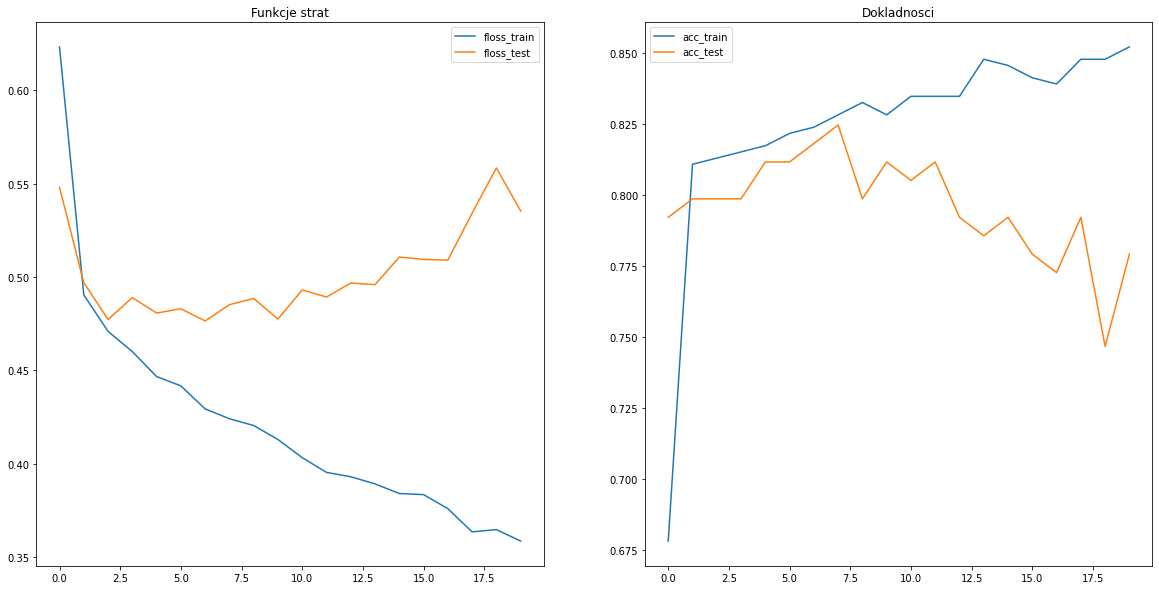

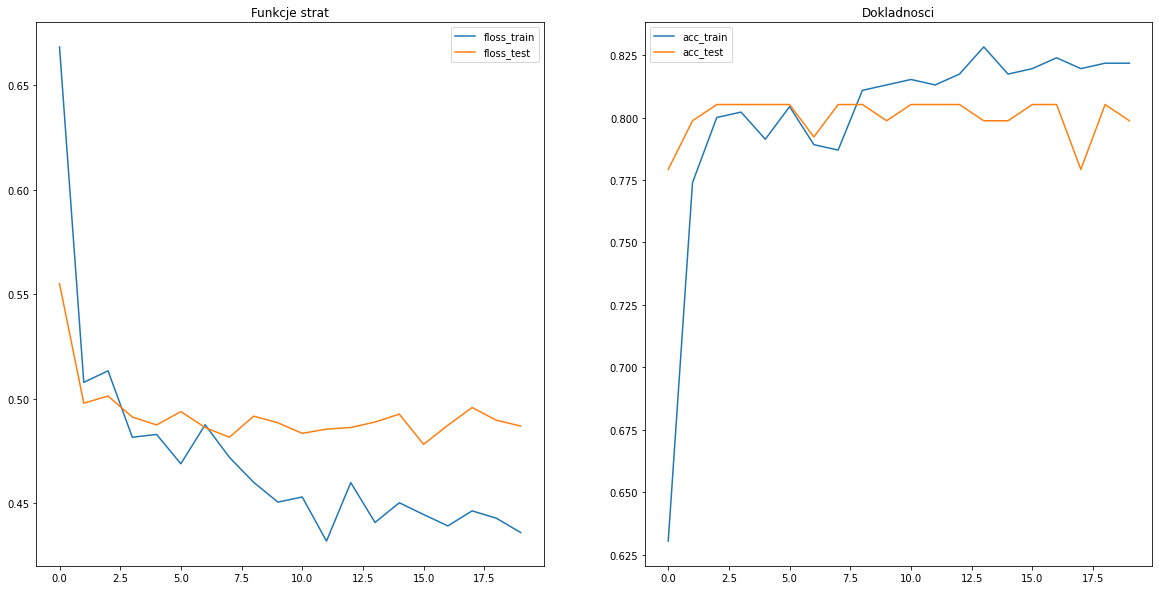

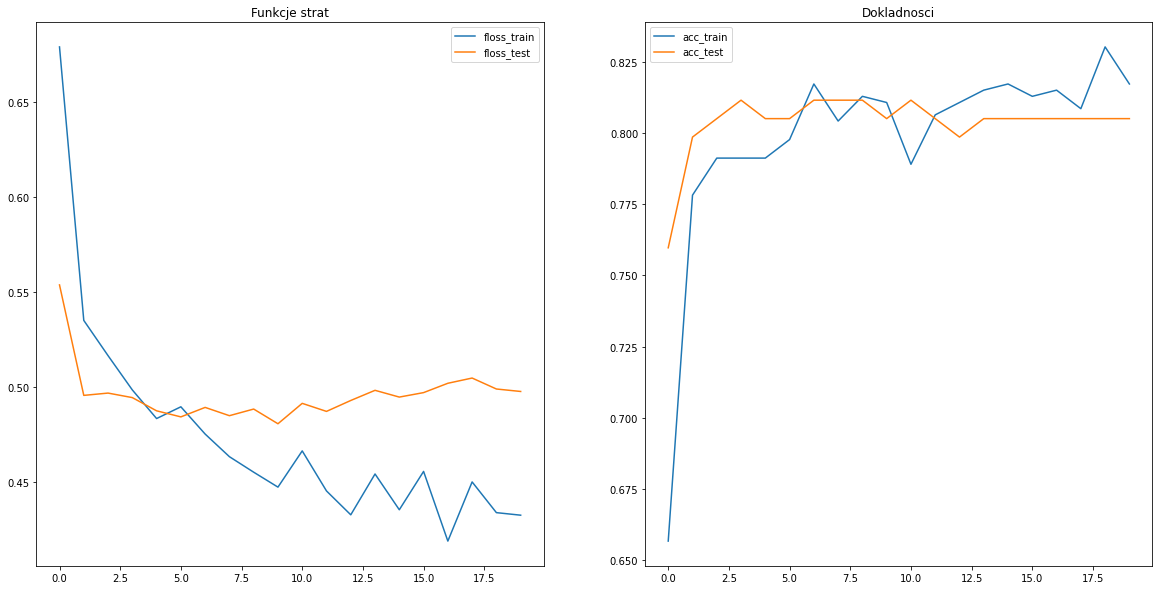

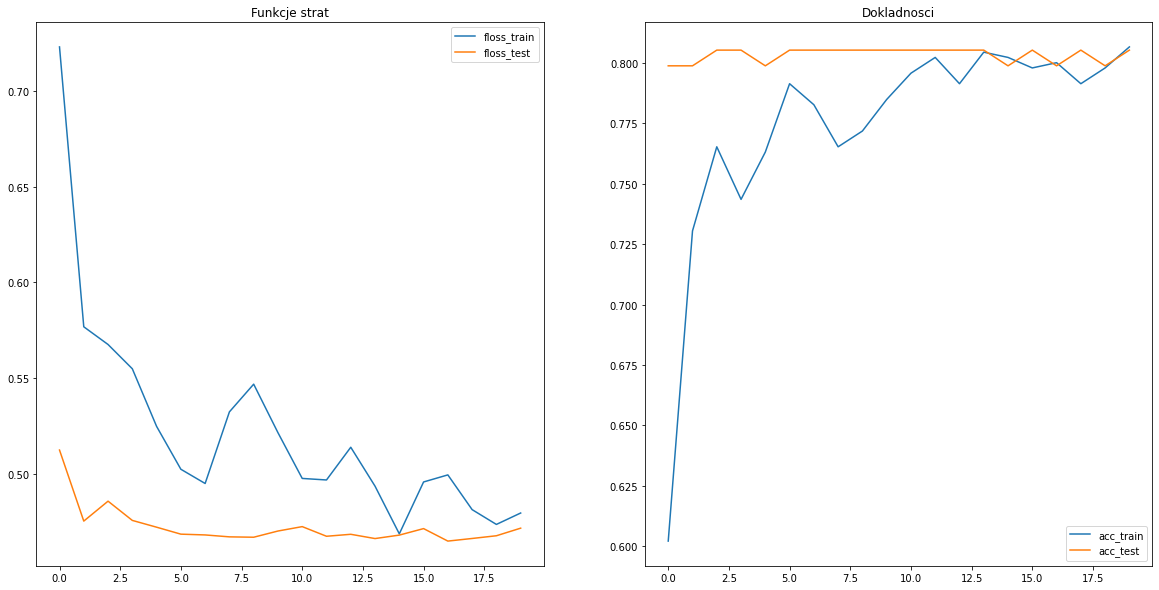

In [69]:
from keras.wrappers.scikit_learn import KerasClassifier #problemy z dostępnością klasyfikatora od 30.12.2023 został zmodyfikowany i przeniesiony
from sklearn.model_selection import GridSearchCV
# krzyżowe przeszukiwanie grida
from matplotlib import pyplot as plt

#keras_classifier = KerasClassifier(build_model)
do_rate=[0,0.2,0.3,0.5]


for x in do_rate:
  model=build_model_6_2(x)
  model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
  historia = model.history.history

  floss_train = historia['loss']
  floss_test = historia['val_loss']
  acc_train = historia['accuracy']
  acc_test = historia['val_accuracy']
  fig,ax = plt.subplots(1,2,figsize=(20,10))
  epochs = np.arange(0,20)
  ax[0].plot(epochs, floss_train, label='floss_train')
  ax[0].plot(epochs, floss_test, label='floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokladnosci')
  ax[1].plot(epochs, acc_train, label='acc_train')
  ax[1].plot(epochs, acc_test, label='acc_test')
  ax[1].legend()


In [70]:
# sprawdzenie najlepszych parametrów za pomocą GridSearch
from keras.wrappers.scikit_learn import KerasClassifier #problemy z dostępnością klasyfikatora od 30.12.2023 został zmodyfikowany i przeniesiony
from sklearn.model_selection import GridSearchCV


keras_classifier = KerasClassifier(build_model_6_2)
param_distribs = {
    'do_rate':[0,0.2,0.3,0.5]
}

grid_search_cv=GridSearchCV(keras_classifier,param_distribs)
grid_result=grid_search_cv.fit(X_train,y_train,epochs=20)
best_params_from_grid=grid_search_cv.best_params_
best_params_from_grid

Epoch 1/20


<ipython-input-70-0f4f59a54a74>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_model_6_2)


12/12 [==============================] - 1s 4ms/step - loss: 0.6575 - accuracy: 0.6359 - recall: 0.8949 - precision: 0.6825
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.5136 - accuracy: 0.7989 - recall: 0.9611 - precision: 0.7942
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4724 - accuracy: 0.8152 - recall: 0.9572 - precision: 0.8119
Epoch 4/20
12/12 [==============================] - 0s 4ms/step - loss: 0.4560 - accuracy: 0.8179 - recall: 0.9805 - precision: 0.8025
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4303 - accuracy: 0.8315 - recall: 0.9689 - precision: 0.8218
Epoch 6/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4151 - accuracy: 0.8315 - recall: 0.9728 - precision: 0.8197
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8288 - recall: 0.9805 - precision: 0.8129
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - 

{'do_rate': 0.2}

**Podsumowanie**
Na podstawie przeprowadzonej analizy można zauważyć, że najmniej rozbieżne wykresy są dla wartości testowanej 0.2, co na wykresie skutkuje zbliżonym przebiegiem wartości testowych i uczacych, co w konsekwencji przekłada się na dokładność działania danej konfiguracji sieci neuronowej.

# **Zadanie 6.3**

In [42]:
from keras.layers import Dense, GaussianNoise
from keras.models import Sequential
from keras.optimizers import Adam

# funkcja tworząca strukturę 
def build_model_6_3(noise=0):
  model = Sequential()
  model.add(Dense(64,activation='relu',input_shape = (X.shape[1],))) # pierwsza warstwa
  
  model.add(GaussianNoise(noise,))#warstwa ukryta 1.
  model.add(Dense(64,'selu'))#warstwa ukryta 2.
  model.add(GaussianNoise(noise,))#warstwa ukryta 3.
  model.add(Dense(64,'selu'))#warstwa ukryta 4.

  model.add(Dense(1,activation='sigmoid'))# ostatnia warstwa
  model.compile(optimizer=Adam(0.001),loss='binary_crossentropy',metrics=('accuracy','Recall','Precision'))
  return model

Epoch 1/30
15/15 [==============================] - 2s 37ms/step - loss: 0.5940 - accuracy: 0.7283 - recall: 0.9265 - precision: 0.7398 - val_loss: 0.5333 - val_accuracy: 0.7922 - val_recall: 0.9725 - val_precision: 0.7852
Epoch 2/30
15/15 [==============================] - 0s 7ms/step - loss: 0.4942 - accuracy: 0.8087 - recall: 0.9776 - precision: 0.7907 - val_loss: 0.4753 - val_accuracy: 0.8117 - val_recall: 0.9908 - val_precision: 0.7941
Epoch 3/30
15/15 [==============================] - 0s 5ms/step - loss: 0.4560 - accuracy: 0.8174 - recall: 0.9808 - precision: 0.7974 - val_loss: 0.4644 - val_accuracy: 0.8052 - val_recall: 0.9908 - val_precision: 0.7883
Epoch 4/30
15/15 [==============================] - 0s 6ms/step - loss: 0.4432 - accuracy: 0.8130 - recall: 0.9744 - precision: 0.7963 - val_loss: 0.4696 - val_accuracy: 0.8117 - val_recall: 0.9908 - val_precision: 0.7941
Epoch 5/30
15/15 [==============================] - 0s 6ms/step - loss: 0.4352 - accuracy: 0.8217 - recall: 0.9

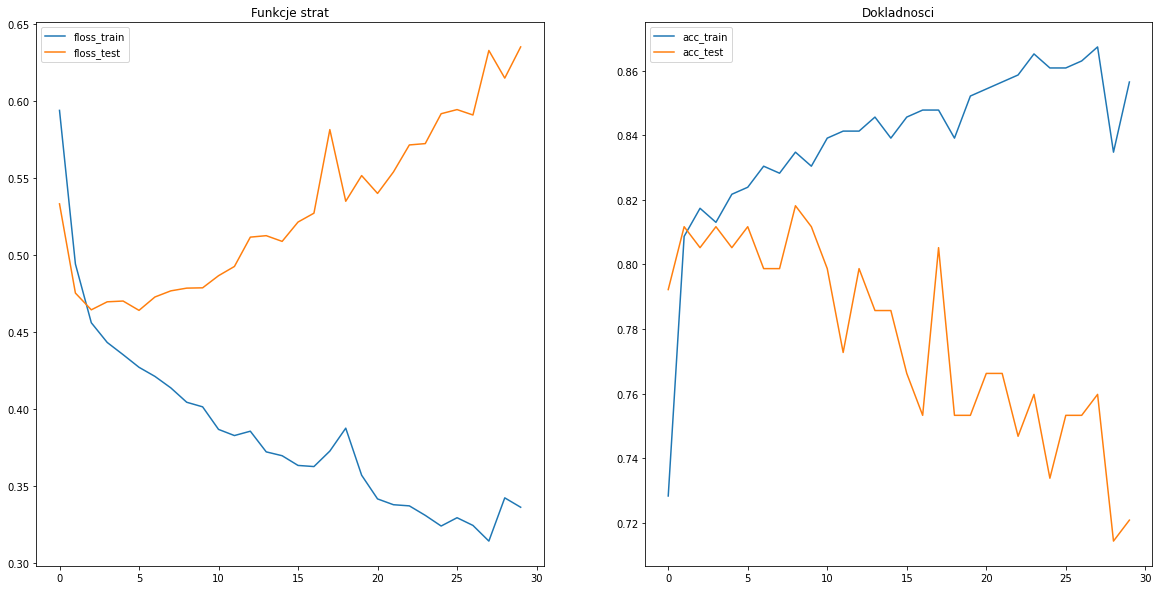

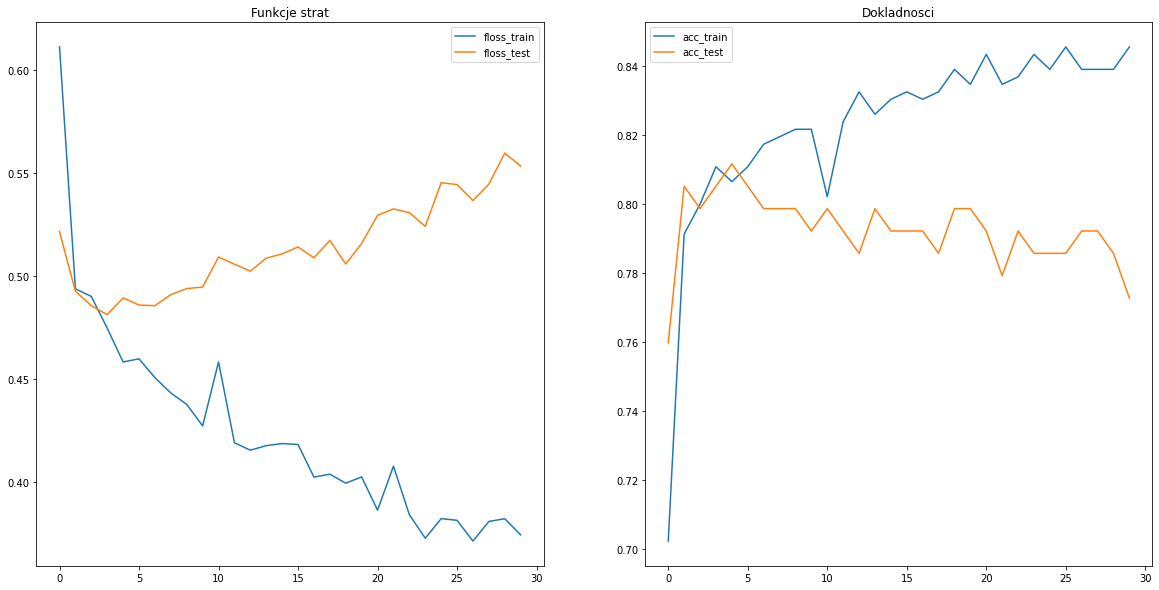

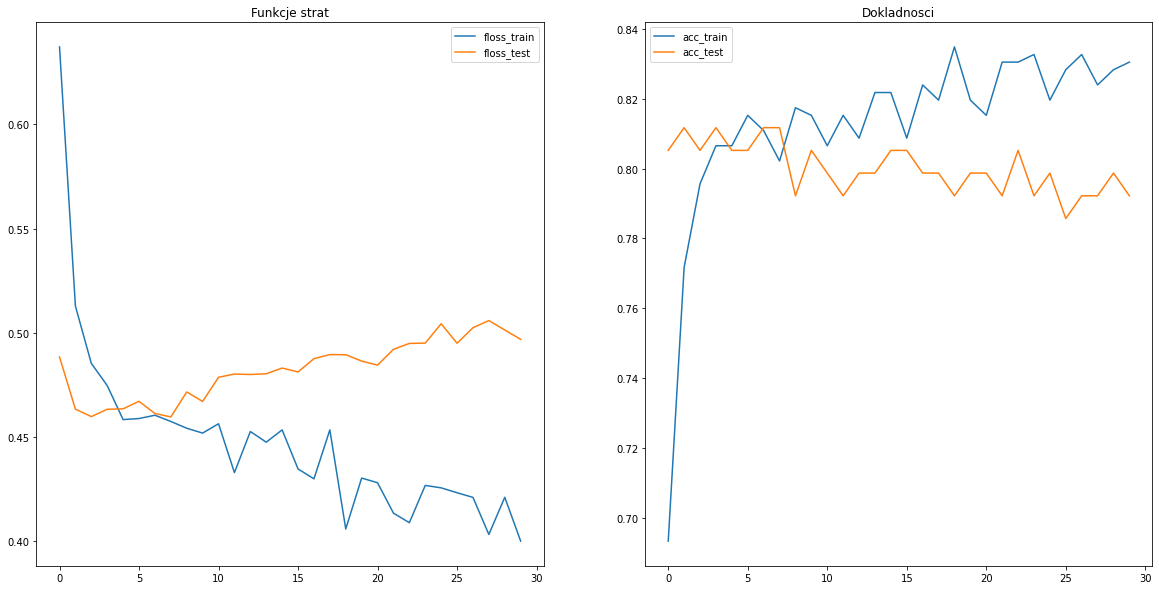

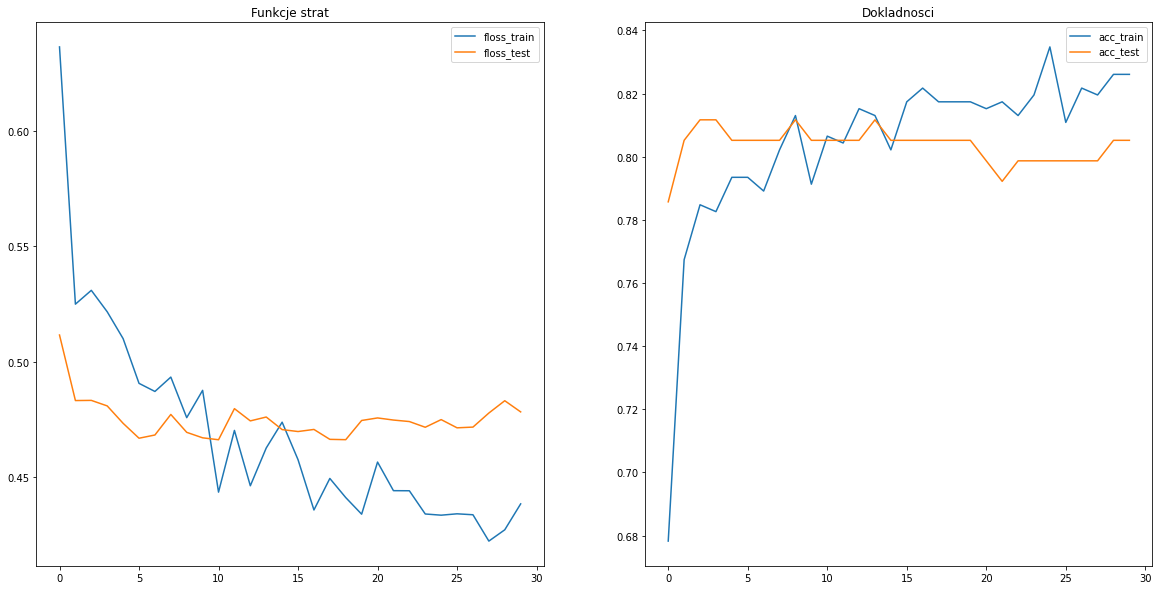

In [43]:
from keras.wrappers.scikit_learn import KerasClassifier #problemy z dostępnością klasyfikatora od 30.12.2023 został zmodyfikowany i przeniesiony
from sklearn.model_selection import GridSearchCV
# krzyżowe przeszukiwanie grida
from matplotlib import pyplot as plt

#keras_classifier = KerasClassifier(build_model)
noise=[0,0.1,0.2,0.3]


for x in noise:
  model=build_model_6_3(x)
  model.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))
  historia = model.history.history
  
  floss_train = historia['loss']
  floss_test = historia['val_loss']
  acc_train = historia['accuracy']
  acc_test = historia['val_accuracy']
  fig,ax = plt.subplots(1,2,figsize=(20,10))
  epochs = np.arange(0,20)
  ax[0].plot(epochs, floss_train, label='floss_train')
  ax[0].plot(epochs, floss_test, label='floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokladnosci')
  ax[1].plot(epochs, acc_train, label='acc_train')
  ax[1].plot(epochs, acc_test, label='acc_test')
  ax[1].legend()

In [44]:
# sprawdzenie najlepszych parametrów za pomocą GridSearch
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV


keras_classifier = KerasClassifier(build_model_6_3)
param_distribs = {
    'noise':[0,0.1,0.2,0.3]
}

grid_search_cv=GridSearchCV(keras_classifier,param_distribs)
grid_result=grid_search_cv.fit(X_train,y_train,epochs=20)
best_params_from_grid=grid_search_cv.best_params_
best_params_from_grid

Epoch 1/13


<ipython-input-44-9eed8bb9c48e>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_model_6_3)


12/12 [==============================] - 1s 5ms/step - loss: 0.6563 - accuracy: 0.6223 - recall: 0.7977 - precision: 0.7021
Epoch 2/13
12/12 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.8098 - recall: 0.9805 - precision: 0.7950
Epoch 3/13
12/12 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.8125 - recall: 0.9728 - precision: 0.8013
Epoch 4/13
12/12 [==============================] - 0s 4ms/step - loss: 0.4457 - accuracy: 0.8125 - recall: 0.9728 - precision: 0.8013
Epoch 5/13
12/12 [==============================] - 0s 6ms/step - loss: 0.4366 - accuracy: 0.8125 - recall: 0.9689 - precision: 0.8032
Epoch 6/13
12/12 [==============================] - 0s 3ms/step - loss: 0.4252 - accuracy: 0.8152 - recall: 0.9689 - precision: 0.8058
Epoch 7/13
12/12 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.8207 - recall: 0.9650 - precision: 0.8131
Epoch 8/13
12/12 [==============================] - 0s 4ms/step - 

{'noise': 0.2}

**Podsumowanie**
Na podstawie przeprowadzonej analizy można zauważyć, że najmniej rozbieżne wykresy są dla wartości testowanej 0.2, co na wykresie skutkuje zbliżonym przebiegiem wartości testowych i uczacych, co w konsekwencji przekłada się na dokładność działania danej konfiguracji sieci neuronowej.

# **Zadanie 6.4**

In [90]:
# funkcja budująca model
from keras.layers.normalization.batch_normalization_v1 import BatchNormalization
from keras.layers.normalization.layer_normalization import LayerNormalization
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.layers import Dropout, GaussianNoise



#model_1: (Dense+LayerNormalization+BatchNormalization+Dropout+GaussianNoise)
#model_2: (Dense +BatchNormalization+Dropout+GaussianNoise)
#model_3: (Dense+LayerNormalization +Dropout+GaussianNoise)
def build_model_6_4(layers=1,mode=1):
  if mode==1:
    block = [Dense,LayerNormalization(),BatchNormalization,Dropout,GaussianNoise]
    args = [(64,'selu'),(),(),(0.5,),(0.1,)]
  elif mode==2:
    block = [Dense,BatchNormalization,Dropout,GaussianNoise]
    args = [(64,'selu'),(),(0.5,),(0.1,)]
  else:
    block = [Dense,LayerNormalization(),Dropout,GaussianNoise]
    args = [(64,'selu'),(),(0.5,),(0.1,)]
  model = Sequential()
  model.add(Dense(64, input_shape=(X.shape[1],), activation='tanh'))#wejściowa

  #for x in range(layers):
  #  model.add(zip(block[x],args[x]))
  
  tmp=0
  for layer,arg in zip(block,args):
    if(tmp<layers):
      model.add(layer(*arg))
      tmp+=1
    else:
      break;

  model.add(Dense(1, activation='sigmoid'))#Dense(ilosc_klas_wyjsciowych,funkcja aktywacji)
  model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=('accuracy', 'Recall', 'Precision'))
  return model


In [92]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
# wykonanie testowania możliwych kombinacji hiperparametrów

keras_classifier = KerasClassifier(build_model_6_4)
param_distribs = {
    'layers':[1,2,3,4,5],
    'mode':[1,2,3]
}

grid_search_cv = GridSearchCV(keras_classifier,param_distribs)
grid_result = grid_search_cv.fit(X_train,y_train,epochs=20)
best_params_from_grid = grid_search_cv.best_params_
best_model_from_grid = grid_search_cv.best_estimator_

Epoch 1/20


<ipython-input-92-ed690a16306e>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_model_6_4)


12/12 [==============================] - 1s 3ms/step - loss: 0.6338 - accuracy: 0.6522 - recall: 0.6848 - precision: 0.7892
Epoch 2/20
12/12 [==============================] - 0s 3ms/step - loss: 0.5027 - accuracy: 0.7908 - recall: 0.9144 - precision: 0.8103
Epoch 3/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4699 - accuracy: 0.8125 - recall: 0.9650 - precision: 0.8052
Epoch 4/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8207 - recall: 0.9767 - precision: 0.8071
Epoch 5/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8207 - recall: 0.9767 - precision: 0.8071
Epoch 6/20
12/12 [==============================] - 0s 4ms/step - loss: 0.4459 - accuracy: 0.8179 - recall: 0.9767 - precision: 0.8045
Epoch 7/20
12/12 [==============================] - 0s 3ms/step - loss: 0.4436 - accuracy: 0.8207 - recall: 0.9767 - precision: 0.8071
Epoch 8/20
12/12 [==============================] - 0s 3ms/step - 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.buil

15/15 [==============================] - 1s 4ms/step - loss: 0.7435 - accuracy: 0.6000 - recall: 0.6230 - precision: 0.7471
Epoch 2/20
15/15 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.7109 - recall: 0.7540 - precision: 0.8082
Epoch 3/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5842 - accuracy: 0.7196 - recall: 0.7891 - precision: 0.7968
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5913 - accuracy: 0.7543 - recall: 0.8339 - precision: 0.8106
Epoch 5/20
15/15 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7543 - recall: 0.8403 - precision: 0.8067
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5295 - accuracy: 0.7696 - recall: 0.8466 - precision: 0.8204
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.5712 - accuracy: 0.7565 - recall: 0.8498 - precision: 0.8036
Epoch 8/20
15/15 [==============================] - 0s 4ms/step - 

In [73]:
#najlepsze parametry znalezione z przeszukiwania grid
best_params_from_grid

{'layers': 2, 'mode': 2}

In [ ]:
# wytrenowanie najlepszego modelu
best_model=build_model_6_4(**best_params_from_grid)
best_model.fit(X_train,y_train,epochs=20,validation_data=[X_test,y_test])

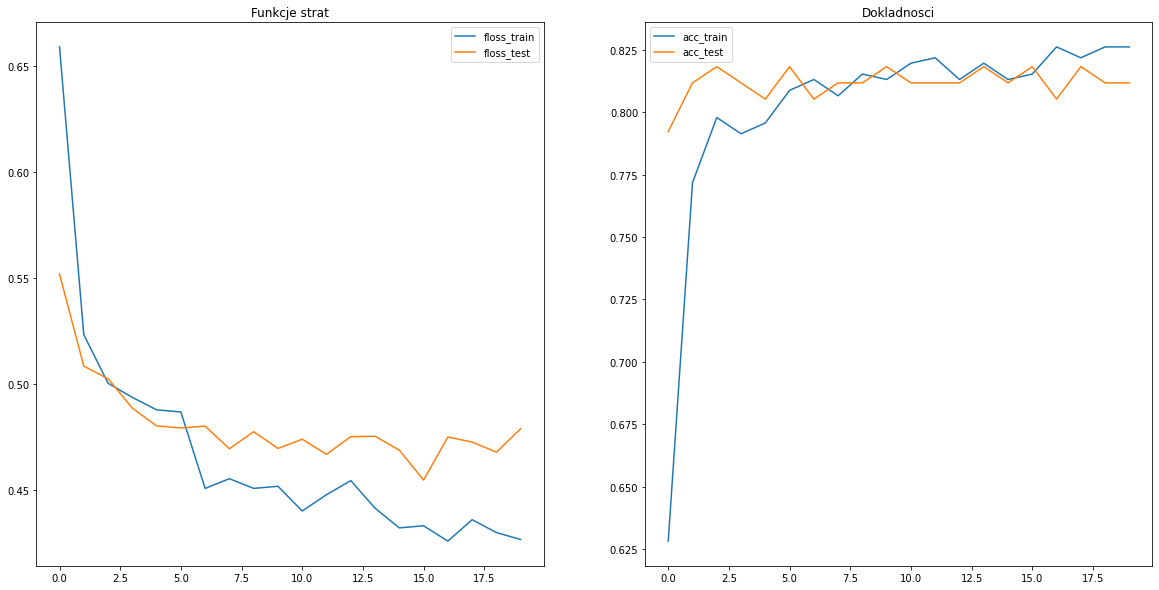

In [77]:
# wygenerowanie wykresu funkcji strat dla najlepszego modelu
from matplotlib import pyplot as plt
historia = best_model.history.history
floss_train = historia['loss']
floss_test = historia['val_loss']
acc_train = historia['accuracy']
acc_test = historia['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))
epochs = np.arange(0, 20)
ax[0].plot(epochs, floss_train, label='floss_train')
ax[0].plot(epochs, floss_test, label='floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokladnosci')
ax[1].plot(epochs, acc_train, label='acc_train')
ax[1].plot(epochs, acc_test, label='acc_test')
ax[1].legend()

In [145]:
def srednia(lista):
	return sum(lista)/len(lista)


In [160]:
#from IPython.core import history
import numpy as np
# wygenerowanie wartości średnich strat i dokładności dla zbioru testowego i uczącego
layers=[1,2,3,4,5]
mode=[1,2,3]



licznik=0

for x in range(5):
  for y in range(3):
    
    model=build_model_6_4(x+1,y+1)
    model.fit(X_train,y_train,epochs=5,validation_data=[X_test,y_test])
    historia = model.history.history
		# loss
    loss = srednia(historia['loss'])
		# val_loss
    val_loss = srednia(historia['val_loss'])
		# accuracy
    accuracy = srednia(historia['accuracy'])
		# val_accuracy
    val_accuracy = srednia(historia['val_accuracy'])
		#wypisanie metryk dla danej sieci
    print("Mode:"+str(x+1)+", layers:"+str(y+1)+"\n")
    print("\tloss:"+str(loss))
    print("\tval_loss:"+str(val_loss))
    print("\taccuracy:"+str(accuracy))
    print("\tval_accuracy:"+str(val_accuracy))
    del model

    
# kod się wywala po trzech iteracjach, choć nie powinien - jednocześnie wyznacza wartości jedynie dla jednej warstwy dla trzech układów




Epoch 1/5
15/15 [==============================] - 1s 31ms/step - loss: 0.6084 - accuracy: 0.6500 - recall: 0.6773 - precision: 0.7794 - val_loss: 0.5326 - val_accuracy: 0.7403 - val_recall: 0.8349 - val_precision: 0.8053
Epoch 2/5
15/15 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.8000 - recall: 0.9329 - precision: 0.8044 - val_loss: 0.4778 - val_accuracy: 0.7857 - val_recall: 0.9541 - val_precision: 0.7879
Epoch 3/5
15/15 [==============================] - 0s 5ms/step - loss: 0.4670 - accuracy: 0.8065 - recall: 0.9649 - precision: 0.7947 - val_loss: 0.4646 - val_accuracy: 0.8117 - val_recall: 0.9908 - val_precision: 0.7941
Epoch 4/5
15/15 [==============================] - 0s 5ms/step - loss: 0.4620 - accuracy: 0.8152 - recall: 0.9744 - precision: 0.7984 - val_loss: 0.4622 - val_accuracy: 0.8117 - val_recall: 0.9908 - val_precision: 0.7941
Epoch 5/5
15/15 [==============================] - 0s 5ms/step - loss: 0.4582 - accuracy: 0.8109 - recall: 0.9776 -

ValueError: ignored

| Liczba bloków | Struktura bloku | Średnia strata na zbiorze uczącym | Średnia strata na zbiorze testowym | Średnia dokładność na zbiorze uczącym | Średnia dokładność na zbiorze testowym |
| --- | --- | --- | --- | --- | --- |
| 1 | Dense + LayerNormalization + BatchNormalization + Dropout + GaussianNoise | 0.49708457589149474 | 0.48029056191444397
 | 0.7765217304229737 | 0.7896103858947754 |

| Liczba bloków | Struktura bloku | Średnia strata na zbiorze uczącym | Średnia strata na zbiorze testowym | Średnia dokładność na zbiorze uczącym | Średnia dokładność na zbiorze testowym |
| --- | --- | --- | --- | --- | --- |
| 1 | Dense + BatchNormalization + Dropout + GaussianNoise | 0.4909500300884247 | 0.48238219022750856 | 0.7913043379783631 | 0.8012986898422241 |

| Liczba bloków | Struktura bloku | Średnia strata na zbiorze uczącym | Średnia strata na zbiorze testowym | Średnia dokładność na zbiorze uczącym | Średnia dokładność na zbiorze testowym |
| --- | --- | --- | --- | --- | --- |
| 1 | Dense + LayerNormalization + Dropout + GaussianNoise | 0.48779297471046446 | 0.4749101400375366 | 0.7813043475151062 | 0.8051947951316833 |


Na podstawie przeprowadzonego poszukiwania krzyżowego możemy wyodrębnić najlepsze parametry dla tej sieci neuronowej na podstawie gdir-search:
{'layers': 2, 'mode': 2}